In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
#Read data
DATA_PATH = "data/Hospital General Information.csv"
data = pd.read_csv(DATA_PATH, encoding="latin-1")

In [3]:
pd.set_option("display.max_columns", 100)
data.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,Meets criteria for meaningful use of EHRs,Hospital overall rating,Hospital overall rating footnote,Mortality national comparison,Mortality national comparison footnote,Safety of care national comparison,Safety of care national comparison footnote,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,3,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes,Y,2,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes,Y,3,NaN,Same as the National average,NaN,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,Yes,Y,3,NaN,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...


In [4]:
def get_count_percentages(df, grouper, feature):
    df_cnt = df.groupby(grouper)[feature].apply(lambda x: x.value_counts())
    df_cnt.name = "{}_cnt".format(feature)
    df_cnt_pct = data.groupby(grouper)[feature].apply(lambda x: x.value_counts(normalize=True))
    df_cnt_pct.name = "{}_cnt_pct".format(feature)
    df_cnt_pct = df_cnt_pct.apply(lambda x: "{:4.2f}%".format(100*x))
    df_merged = pd.merge(df_cnt, df_cnt_pct, left_index=True, right_index=True)
    return df_merged

In [5]:
rating_cnt_pct = get_count_percentages(data, grouper="Hospital Type", feature="Hospital overall rating")
rating_cnt_pct

Hospital overall rating_cnt  \
Hospital Type                                                          
Acute Care Hospitals      3                                     1426   
                          4                                      749   
                          2                                      659   
                          Not Available                          321   
                          1                                      117   
                          5                                      110   
Childrens                 Not Available                           99   
Critical Access Hospitals Not Available                          750   
                          3                                      346   
                          4                                      215   
                          2                                       25   
                          5                                        1   

                                        Hospital overall rating_cnt_pct  
Hospital Type                                                            
Acute Care Hospitals      3                                      42.16%  
                          4                                      22.15%  
                          2                                      19.49%  
                          Not Available                           9.49%  
                          1                                       3.46%  
                          5                                       3.25%  
Childrens                 Not Available                         100.00%  
Critical Access Hospitals Not Available                          56.10%  
                          3                                      25.88%  
                          4                                      16.08%  
                          2                                       1.87%  
                          5                                       0.07%

Since **Childrens** and **Critical Access** hospitals have most of the rating unavailable, lets focus our analysis on **Acute Care** hospitals.

Lets subset the data to only have Acute care hospitals which have ratings available

In [6]:
data = data.loc[(data["Hospital Type"] == "Acute Care Hospitals") & (data["Hospital overall rating"] != "Not Available")]
data.shape

(3061, 28)

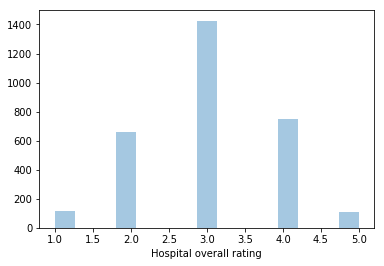

count    3061.000000
mean        3.024828
std         0.869624
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Hospital overall rating, dtype: float64

In [7]:
data["Hospital overall rating"] = data["Hospital overall rating"].astype(int)
sns.distplot(data["Hospital overall rating"], kde=False)
plt.show()

data["Hospital overall rating"].describe()

**Average rating across all hospitals is 3.02**

### Does ownership of hospital matter??

In [8]:
data.groupby("Hospital Ownership").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating        \
                                                               mean count   
Hospital Ownership                                                          
Government - Federal                                       2.933333    15   
Government - Hospital District or Authority                2.961686   261   
Government - Local                                         2.791667   168   
Government - State                                         2.636364    44   
Physician                                                  4.096774    31   
Proprietary                                                2.905213   633   
Tribal                                                     2.500000     2   
Voluntary non-profit - Church                              3.145455   275   
Voluntary non-profit - Other                               3.112069   348   
Voluntary non-profit - Private                             3.066978  1284   

                                                              
                                            median       std  
Hospital Ownership                                            
Government - Federal                           3.0  0.883715  
Government - Hospital District or Authority    3.0  0.812444  
Government - Local                             3.0  0.867609  
Government - State                             3.0  1.036338  
Physician                                      4.0  1.044185  
Proprietary                                    3.0  0.880802  
Tribal                                         2.5  0.707107  
Voluntary non-profit - Church                  3.0  0.871658  
Voluntary non-profit - Other                   3.0  0.818780  
Voluntary non-profit - Private                 3.0  0.848749

### Observations
* **Goverment owned hospitals have slightly lower ratings compared to Voluntary ones**
* **Physician have higher ratings**
* **there are just two tribal hospitals, could be dropped from analysis possibly**

### Mortality comparison

In [9]:
data.groupby("Mortality national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating                       
                                                 mean count median       std
Mortality national comparison                                               
Above the National average                   3.290000   400      3  0.918154
Below the National average                   2.481050   343      2  0.775402
Not Available                                3.634021   194      4  0.946812
Same as the National average                 3.007062  2124      3  0.811160

### Safety of care

In [10]:
data.groupby("Safety of care national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating               \
                                                      mean count median   
Safety of care national comparison                                        
Above the National average                        3.437811   804      3   
Below the National average                        2.362556   673      2   
Not Available                                     3.121951   205      3   
Same as the National average                      3.092821  1379      3   

                                              
                                         std  
Safety of care national comparison            
Above the National average          0.836504  
Below the National average          0.814248  
Not Available                       0.678635  
Same as the National average        0.748544

### Readmission

In [11]:
data.groupby("Readmission national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating                       
                                                   mean count median       std
Readmission national comparison                                               
Above the National average                     3.567636   791      4  0.737882
Below the National average                     2.375443   847      2  0.767706
Not Available                                  3.919355   124      4  0.950796
Same as the National average                   3.032333  1299      3  0.671132

### Patient Experience

In [12]:
data.groupby("Patient experience national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating               \
                                                          mean count median   
Patient experience national comparison                                        
Above the National average                            3.689966   887      4   
Below the National average                            2.416126  1079      2   
Not Available                                         2.858586    99      3   
Same as the National average                          3.108434   996      3   

                                                  
                                             std  
Patient experience national comparison            
Above the National average              0.715627  
Below the National average              0.746146  
Not Available                           0.606262  
Same as the National average            0.651469

### Effectiveness of care

In [13]:
data.groupby("Effectiveness of care national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating        \
                                                             mean count   
Effectiveness of care national comparison                                 
Above the National average                               3.077699   991   
Below the National average                               2.716049   405   
Same as the National average                             3.068468  1665   

                                                            
                                          median       std  
Effectiveness of care national comparison                   
Above the National average                     3  0.872137  
Below the National average                     3  0.768091  
Same as the National average                   3  0.876439

### Timeliness of care

In [14]:
data.groupby("Timeliness of care national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating               \
                                                          mean count median   
Timeliness of care national comparison                                        
Above the National average                            3.217918   826      3   
Below the National average                            2.618465   899      3   
Not Available                                         3.615894   151      4   
Same as the National average                          3.123207  1185      3   

                                                  
                                             std  
Timeliness of care national comparison            
Above the National average              0.707342  
Below the National average              0.897989  
Not Available                           1.063710  
Same as the National average            0.803293

### Efficient use of medical imaging

In [15]:
data.groupby("Efficient use of medical imaging national comparison").agg({"Hospital overall rating": ["mean", "count", "median", "std"]})

Hospital overall rating  \
                                                                      mean   
Efficient use of medical imaging national compa...                           
Above the National average                                        3.033426   
Below the National average                                        2.858824   
Not Available                                                     3.086331   
Same as the National average                                      3.035437   

                                                                           
                                                   count median       std  
Efficient use of medical imaging national compa...                         
Above the National average                           359      3  0.902509  
Below the National average                           340      3  0.822299  
Not Available                                        556      3  0.890244  
Same as the National average                        1806      3  0.862173

### Observations:
* Difference between above and below is highest for timeliness(2.6 to 3.1)
* All variables seem to have an impact on hospital rating
* In many cases, when data for variable in not available, it has higher/lower than average rating.